# Sales Prediction 

Importing necessary libraries 

In [40]:
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Loading the DataSet

In [41]:
df=pd.read_csv("C:/Users/adity/Downloads/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [43]:
df.shape

(200, 4)

Data Preprocessing

In [44]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [45]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Visualization of Data

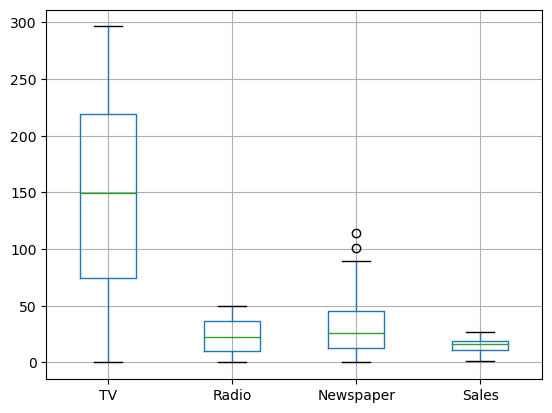

In [48]:
df.boxplot()
plt.show()

In [49]:
# IQR
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower_arr = np.where(df['Newspaper']<=lower)[0]
upper_arr = np.where(df['Newspaper']>=upper)[0]

Removing outliers

In [50]:
df.drop(index=lower_arr, inplace=True)
df.drop(index=upper_arr, inplace=True)
df.shape

(198, 4)

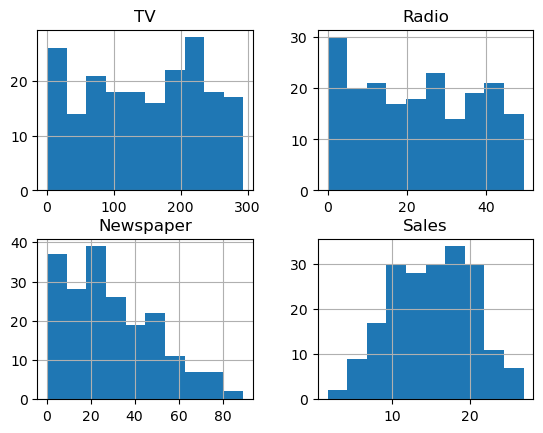

In [51]:
df.hist()
plt.show()

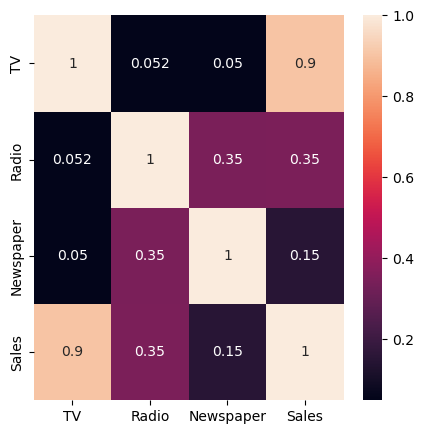

In [54]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

Splitting Up Dataset

In [55]:
x=df.drop(columns='Sales',axis=1)
y=df['Sales']
print(x)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[198 rows x 3 columns]


In [56]:
print(y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 198, dtype: float64


Making up Trained data and Test Data for X and Y data

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=42,test_size=0.25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((148, 3), (50, 3), (148,), (50,))

Deploying ML model

In [59]:
mod=LinearRegression()
mod.fit(x_train,y_train)


LinearRegression()

In [62]:
x_train_prediction=mod.predict(x_train)
x_test_prediction=mod.predict(x_test)
print(x_test_prediction)

[ 8.75395337 13.75780696 24.17994667 11.20387675  9.50843862 21.14955499
 20.08420493 12.85100155 15.04056917 20.80168862 15.96236713 20.38933541
  8.35818382 13.95710537  8.96120448 10.84693446  9.57322542 15.75094281
  9.82317869 11.59783136 12.77706488 17.00451412 23.40685922  7.13988841
 18.52177068 20.79339995  8.46081972 18.53984848  7.54524225 14.88991117
 18.70805914 14.00840974  9.00637237 13.12154051 19.15238215 17.63800025
 16.78339507 14.41754941 19.64573074 17.57367693 18.75568889 10.93999607
 13.57076404 10.36936366  7.45155755  7.88600787 16.51998643 17.89449375
 10.25617618 23.12694606]


In [74]:
r2=mod.score(x_train, y_train)
print(r2)
Prediction_model=[[100,100,100]]
print('Sales of TV, Radio and Newspaper is :', mod.predict(Prediction_model))

0.8942150698381676
Sales of TV, Radio and Newspaper is : [21.13616819]


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
